# Fraud Detection
Building Logistic Regression, Decision Tree, and Random Forest Models for Fraud Detection

## Summary of Results (on Test Data)

### Logistic Regression
Accuracy: >99.99%

Precision: 98%

Recall: >99.99%

Receiver Operating Characteristic AUC: 1.00

### Decision Tree
Accuracy: 100%

Precision: 100%

Recall: 100%

Receiver Operating Characteristic AUC: 1.00

### Random Forest
Accuracy: 100%

Precision: 100%

Recall: 100%

Receiver Operating Characteristic AUC: 1.00

In [1]:
import math
import pandas as pd
import numpy as np

import seaborn as sns

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE 

import warnings
warnings.filterwarnings('ignore')

# pd.set_option('precision', 4)

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

# Loading Data

In [3]:
df_1 = pd.read_csv(r'/Users/kaihayden/Desktop/MSCA/Consulting/fraud/fraudTrain.csv')
df_2 = pd.read_csv(r'/Users/kaihayden/Desktop/MSCA/Consulting/fraud/fraudTest.csv')

df = pd.concat([df_1,df_2])
df.drop_duplicates(inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Inspecting data

In [4]:
# Checking column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [5]:
# checking null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
# checking unique values
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [7]:
# checking dataframe shape
df.shape

(1852394, 22)

### Distribution of Dependent Variable

In [8]:
df_fraud=df[['is_fraud','cc_num']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


# Datetime Preprocessing

In [9]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

df['trans_year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_hour']  = df['trans_date_trans_time'].dt.hour
df['trans_dotw']  = df['trans_date_trans_time'].dt.day_name()

df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))

# Exploratory Data Analysis

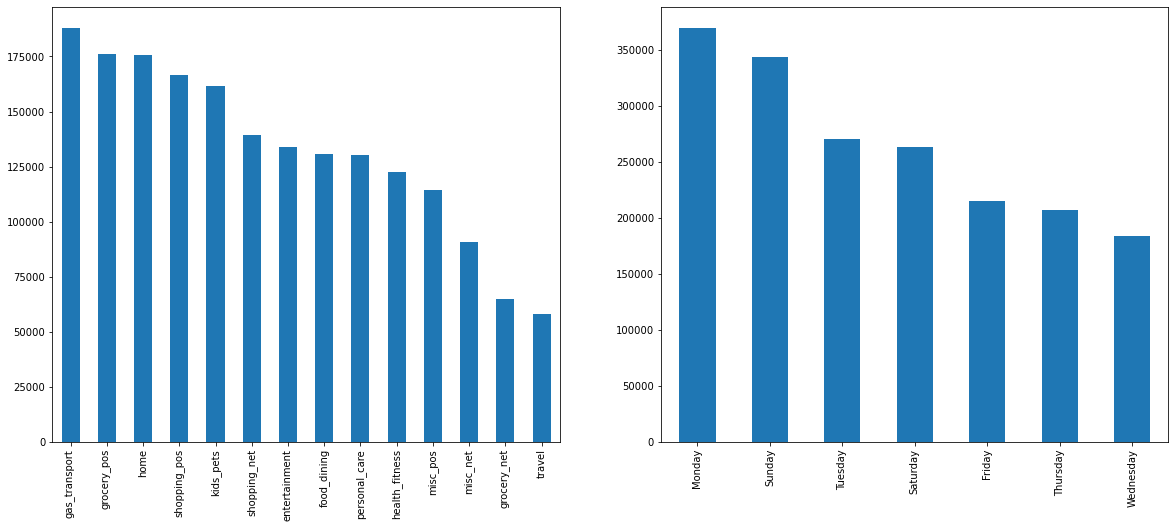

In [10]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['trans_dotw'].value_counts().plot.bar();

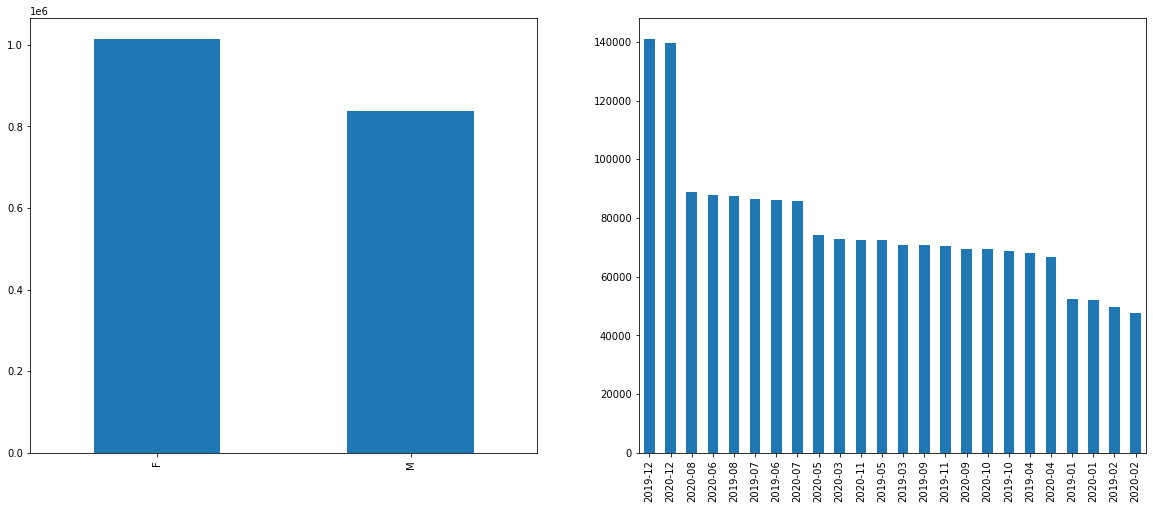

In [11]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['trans_year_month'].value_counts().plot.bar();

In [12]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
          .reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
                                 .reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
                                 .reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.852394e+06,1.842743e+06,9651.000000
1,mean,7.006357e+01,6.765128e+01,530.661412
2,std,1.592540e+02,1.535481e+02,391.028873
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.745000e+01,4.724000e+01,390.000000
5,95%,1.953400e+02,1.895900e+02,1084.090000
6,99.9%,1.517241e+03,1.519623e+03,1293.127000
7,max,2.894890e+04,2.894890e+04,1376.040000


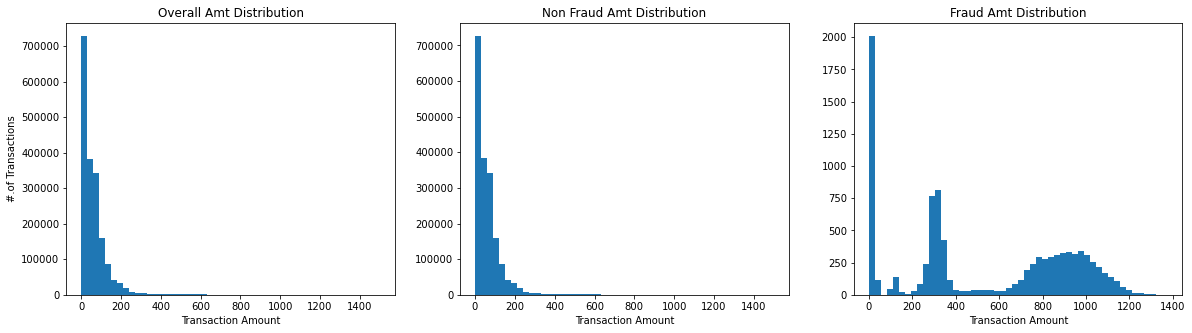

In [13]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

ax[0].hist(df[df['amt']<=1500]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

### Comparing Fraud Transactions and Fraud Customers

In [14]:
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline.columns = ['trans_year_month','num_of_fraud_transactions','fraud_customers']
df_timeline

,trans_year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


In [15]:
transactions_per_fraud = df_timeline['num_of_fraud_transactions'].mean()/df_timeline['fraud_customers'].mean()
print(f'Average # of Fraudulent Transactions per Fraud Customer: {transactions_per_fraud}')

Average # of Fraudulent Transactions per Fraud Customer: 9.593439363817097


# Gender
### EDA

In [16]:
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

,Gender,gender_count,percent
0,F,1014749,54.780408
1,M,837645,45.219592


In [17]:
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')

df_fraud_gender['gender_percent'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100

df_fraud_gender

,Gender,is_fraud,count,gender_count,gender_percent
0,F,0,1009850,1014749,99.517221
1,F,1,4899,1014749,0.482779
2,M,0,832893,837645,99.432695
3,M,1,4752,837645,0.567305


# Category
### EDA

In [18]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['category_proportion'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category = df_category.sort_values(by = ['category_proportion'], ascending=False)

df_category

,Category,category_count,category_proportion
2,gas_transport,188029,10.150594
4,grocery_pos,176191,9.511529
6,home,175460,9.472067
12,shopping_pos,166463,8.986371
7,kids_pets,161727,8.730702
11,shopping_net,139322,7.521186
0,entertainment,134118,7.240252
1,food_dining,130729,7.057300
10,personal_care,130085,7.022534
5,health_fitness,122553,6.615925


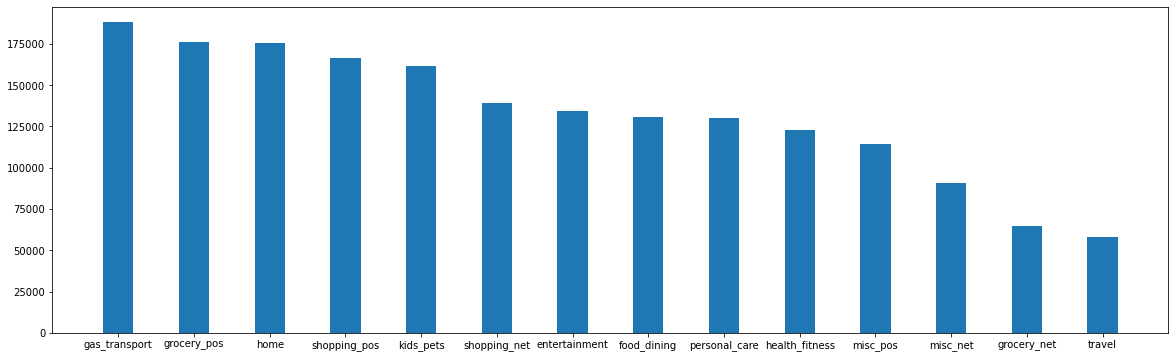

In [19]:
fig = plt.figure(figsize = (20, 6)) 
plt.bar(df_category['Category'], df_category['category_count'], width = 0.4)
plt.show()

In [20]:
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','category_proportion']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['category_fraud_percent'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100

In [21]:
df_fraud_category = df_fraud_category[df_fraud_category['is_fraud']==1].sort_values(by = ['category_fraud_percent'], ascending=False)
df_fraud_category

,Category,is_fraud,count,category_count,category_proportion,category_fraud_percent
23,shopping_net,1,2219,139322,7.521186,1.592713
17,misc_net,1,1182,90654,4.893883,1.303859
9,grocery_pos,1,2228,176191,9.511529,1.264537
25,shopping_pos,1,1056,166463,8.986371,0.634375
5,gas_transport,1,772,188029,10.150594,0.410575
19,misc_pos,1,322,114229,6.166561,0.281890
7,grocery_net,1,175,64878,3.502387,0.269737
27,travel,1,156,57956,3.128708,0.269170
21,personal_care,1,290,130085,7.022534,0.222931
1,entertainment,1,292,134118,7.240252,0.217719


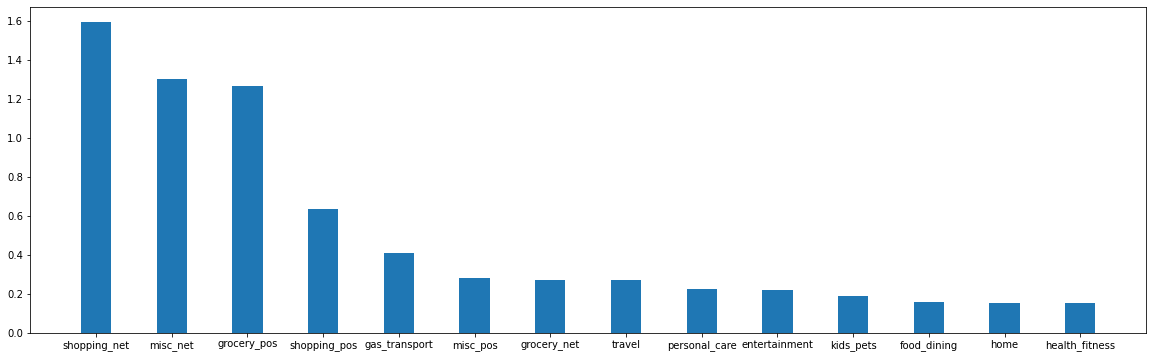

In [22]:
fig = plt.figure(figsize = (20, 6)) 
plt.bar(df_fraud_category['Category'], df_fraud_category['category_fraud_percent'],  width = 0.4)
plt.show()

In [23]:
df_customer_category_amt = df[df['is_fraud']==0][['cc_num','category','amt']].groupby(['cc_num','category'])['amt']\
                                                                             .agg(customer_category_avg_trans_amt='mean',
                                                                                  customer_category_med_trans_amt='median').reset_index()

Text(0.5, 0, 'Count')

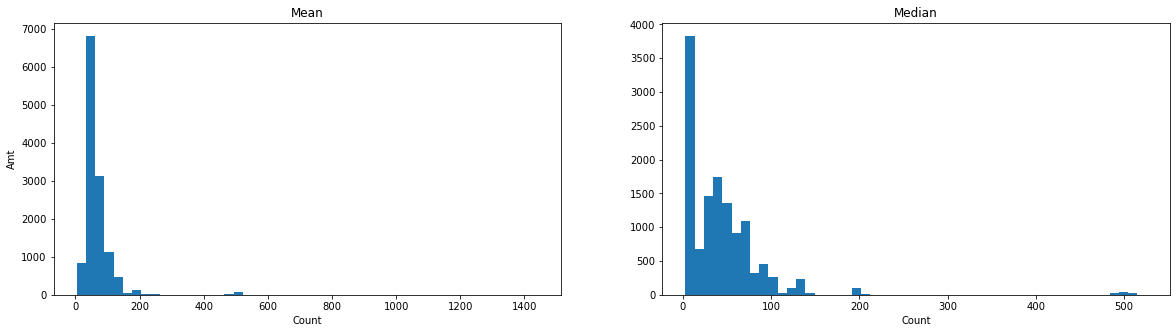

In [24]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

ax[0].hist(df_customer_category_amt['customer_category_avg_trans_amt'], bins=50)
ax[1].hist(df_customer_category_amt['customer_category_med_trans_amt'], bins=50)

ax[0].set_title('Mean')
ax[1].set_title('Median')

ax[0].set_ylabel('Amt')
ax[0].set_xlabel('Count')
ax[1].set_xlabel('Count')

### Features Engineered
 - df_customer_category_amt['customer_category_avg_trans_amt']
 - df_customer_category_amt['customer_category_med_trans_amt']

# Merchant
### EDA

In [25]:
df.merchant.value_counts(normalize=True, ascending=False)

fraud_Kilback LLC                        0.003380
fraud_Cormier LLC                        0.002832
fraud_Schumm PLC                         0.002804
fraud_Kuhn LLC                           0.002716
fraud_Boyer PLC                          0.002699
                                           ...   
fraud_Douglas, DuBuque and McKenzie      0.000594
fraud_Treutel-King                       0.000593
fraud_Satterfield-Lowe                   0.000591
fraud_Hahn, Douglas and Schowalter       0.000589
fraud_Ritchie, Bradtke and Stiedemann    0.000588
Name: merchant, Length: 693, dtype: float64

In [26]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['merchant_proportion'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['merchant_proportion'], ascending=False)

,Merchant,merchant_count,merchant_proportion
316,fraud_Kilback LLC,6262,0.338049
105,fraud_Cormier LLC,5246,0.283201
571,fraud_Schumm PLC,5195,0.280448
349,fraud_Kuhn LLC,5031,0.271594
70,fraud_Boyer PLC,4999,0.269867
...,...,...,...
143,"fraud_Douglas, DuBuque and McKenzie",1101,0.059437
633,fraud_Treutel-King,1098,0.059275
544,fraud_Satterfield-Lowe,1095,0.059113
221,"fraud_Hahn, Douglas and Schowalter",1091,0.058897


In [27]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','merchant_proportion']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['merchant_fraud_percent'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [28]:
df_fraud_merchant = df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['merchant_fraud_percent'],ascending=False)
df_fraud_merchant

,Merchant,is_fraud,count,merchant_count,merchant_proportion,merchant_fraud_percent
673,fraud_Kozey-Boehm,1,60,2758,0.148888,2.175489
490,"fraud_Herman, Treutel and Dickens",1,38,1870,0.100950,2.032086
1226,fraud_Terry-Huel,1,56,2864,0.154611,1.955307
607,fraud_Kerluke-Abshire,1,50,2635,0.142248,1.897533
884,"fraud_Mosciski, Ziemann and Farrell",1,53,2821,0.152289,1.878766
...,...,...,...,...,...,...
775,"fraud_Lesch, D'Amore and Brown",1,1,2659,0.143544,0.037608
1089,"fraud_Schaefer, Fay and Hilll",1,1,2664,0.143814,0.037538
950,"fraud_Parker, Nolan and Trantow",1,1,2795,0.150886,0.035778
1335,fraud_Windler LLC,1,1,3170,0.171130,0.031546


Text(0.5, 0, 'Fraudulent % of Transactions')

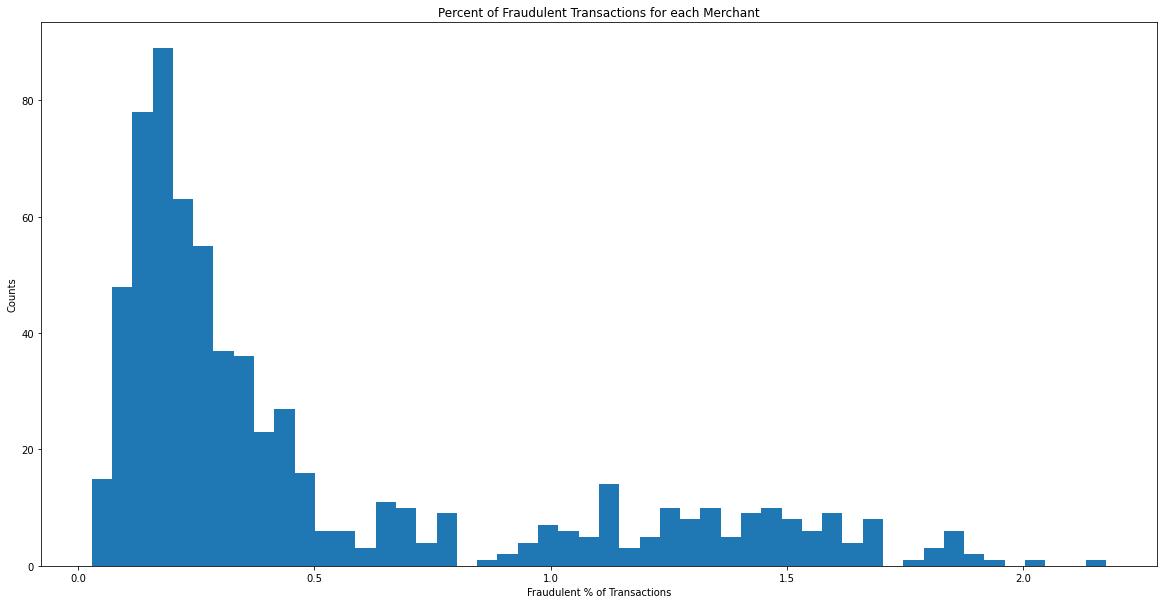

In [29]:
fig, ax = plt.subplots(1,figsize=(20,10))

ax.hist(df_fraud_merchant['merchant_fraud_percent'], bins=50)
ax.set_title('Percent of Fraudulent Transactions for each Merchant')
ax.set_ylabel('Counts')
ax.set_xlabel('Fraudulent % of Transactions')

In [30]:
df_merchant_amt = df[df['is_fraud']==0][['merchant','amt']].groupby('merchant')['amt']\
                                                           .agg(merchant_avg_trans_amt='mean',merchant_med_trans_amt='median').reset_index()

Text(0.5, 0, 'Count')

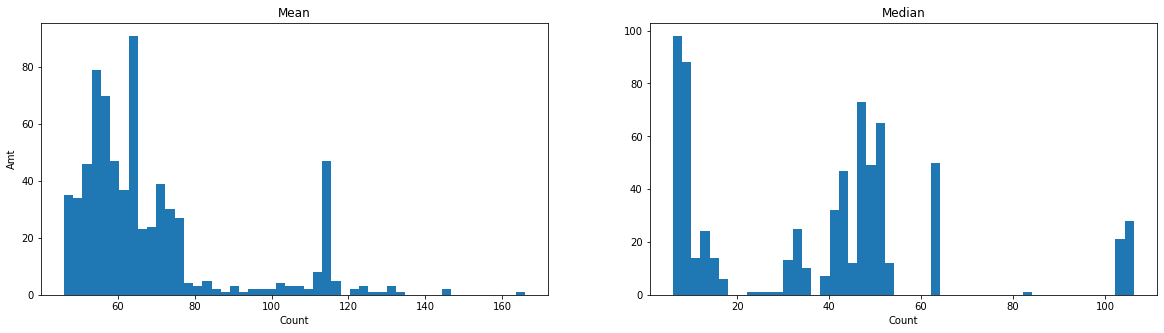

In [31]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

ax[0].hist(df_merchant_amt['merchant_avg_trans_amt'], bins=50)
ax[1].hist(df_merchant_amt['merchant_med_trans_amt'], bins=50)

ax[0].set_title('Mean')
ax[1].set_title('Median')

ax[0].set_ylabel('Amt')
ax[0].set_xlabel('Count')
ax[1].set_xlabel('Count')

### Features Engineered
 - df_merchant_amt['merchant_avg_trans_amt']
 - df_merchant_amt['merchant_med_trans_amt']

# Distance
### EDA

In [32]:
df['dist'] = haversine(df['lat'],df['long'],df['merch_lat'],df['merch_long'])

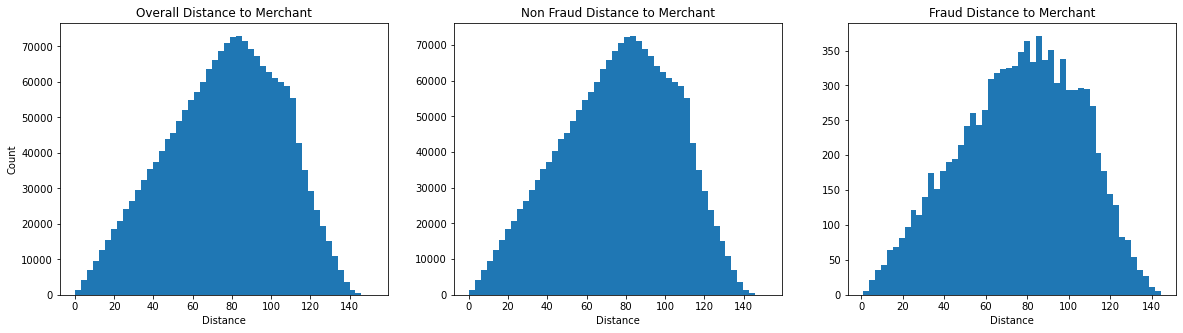

In [33]:
fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].hist(df['dist'], bins=50)
ax[1].hist(df[df['is_fraud']==0]['dist'], bins=50)
ax[2].hist(df[df['is_fraud']==1]['dist'], bins=50)

ax[0].set_title('Overall Distance to Merchant')
ax[1].set_title('Non Fraud Distance to Merchant')
ax[2].set_title('Fraud Distance to Merchant')

ax[0].set_ylabel('Count')

ax[0].set_xlabel('Distance')
ax[1].set_xlabel('Distance')
ax[2].set_xlabel('Distance')
plt.show()

### Features Engineered

 - df['dist']

# One-hot Categorical Variables

In [34]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
hour_onehot = pd.get_dummies(df.trans_hour, prefix='hour', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.trans_dotw, prefix='week',drop_first=True)

In [35]:
df1 = pd.concat([df, category_onehot,gender_onehot,hour_onehot,day_of_week_onehot], axis=1)

# Historical Variables

In [36]:
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()

df1['val_for_agg'] = 1

df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,hour_21,hour_22,hour_23,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,val_for_agg
time_index,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,0,0,0,0,0,0,1,0,1
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,0,0,0,0,0,0,1,0,1
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,0,0,0,0,0,0,1,0,1
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,0,0,0,0,1,0,1
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,0,0,0,0,0,0,1,0,1


### 30 Day Transaction Count

In [37]:
df_hist_trans_30d = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('30D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_30d.columns = ['cc_num','trans_date','hist_trans_30d']

In [38]:
df_hist_trans_30d['trans_date'] = df_hist_trans_30d['trans_date'].dt.date

In [39]:
df_hist_trans_30d = df_hist_trans_30d.groupby(['cc_num','trans_date'])['hist_trans_30d'].min().reset_index()

### 24 Hour Transaction Count

In [40]:
df_hist_trans_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

### 24 Hour Fraud Count

In [41]:
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

### 2 Hour Fraud Count

In [42]:
df_hist_fraud_trans_2h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

### 30 Day Average Transaction Amount

In [43]:
df_hist_trans_amt_avg_30d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('30D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_30d.columns = ['cc_num','trans_date','hist_trans_avg_amt_30d']

In [44]:
df_hist_trans_amt_avg_30d['trans_date'] = df_hist_trans_amt_avg_30d['trans_date'].dt.date

In [45]:
df_hist_trans_amt_avg_30d = df_hist_trans_amt_avg_30d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_30d'].min().reset_index()

### Features Engineered
 - df_hist_trans_amt_avg_30d['hist_trans_amt_avg_30d']
 - df_hist_trans_30d['hist_trans_30d']
 - df_hist_trans_24h['hist_trans_24h']
 - df_hist_fraud_trans_24h['df_hist_fraud_trans_24h']
 - df_hist_fraud_trans_2h['hist_fraud_trans_2h']

# Customers

In [46]:
df_customer_avg_merchant_spend = df1[['cc_num','merchant','amt']].reset_index()\
                                                                 .groupby(['cc_num','merchant'])['amt']\
                                                                 .agg(mean_customer_merchant_spend='mean',median_customer_merchant_spend='median').reset_index()
df_customer_avg_merchant_spend

,cc_num,merchant,mean_customer_merchant_spend,median_customer_merchant_spend
0,60416207185,fraud_Abbott-Rogahn,23.276667,27.830
1,60416207185,fraud_Abbott-Steuber,49.525000,43.840
2,60416207185,fraud_Abernathy and Sons,18.363333,15.030
3,60416207185,fraud_Abshire PLC,66.130000,71.705
4,60416207185,"fraud_Adams, Kovacek and Kuhlman",78.276667,79.440
...,...,...,...,...
529323,4992346398065154184,fraud_Zemlak Group,164.466667,216.640
529324,4992346398065154184,"fraud_Zemlak, Tillman and Cremin",35.378000,30.590
529325,4992346398065154184,fraud_Ziemann-Waters,43.340000,30.650
529326,4992346398065154184,"fraud_Zieme, Bode and Dooley",55.781000,56.085


In [47]:
df_customer_avg_spend = df1[['cc_num','amt']].reset_index()\
                                             .groupby(['cc_num'])['amt']\
                                             .agg(mean_spend='mean',median_spend='median').reset_index()
df_customer_avg_spend

,cc_num,mean_spend,median_spend
0,60416207185,59.257796,36.540
1,60422928733,65.483159,51.405
2,60423098130,96.376084,35.425
3,60427851591,107.487550,76.670
4,60487002085,64.096925,35.670
...,...,...,...
994,4958589671582726883,67.205600,50.130
995,4973530368125489546,75.789148,52.660
996,4980323467523543940,70.709484,42.515
997,4989847570577635369,93.008939,57.170


In [48]:
df_customer_merchant_visits = df1[['cc_num','merchant','amt']].reset_index()\
                                                              .groupby(['cc_num','merchant'])['amt']\
                                                              .count().reset_index()
df_customer_merchant_visits.rename(columns={"amt": "customer_merchant_visits"},inplace=True)

df_customer_merchant_visits

,cc_num,merchant,customer_merchant_visits
0,60416207185,fraud_Abbott-Rogahn,3
1,60416207185,fraud_Abbott-Steuber,6
2,60416207185,fraud_Abernathy and Sons,3
3,60416207185,fraud_Abshire PLC,4
4,60416207185,"fraud_Adams, Kovacek and Kuhlman",3
...,...,...,...
529323,4992346398065154184,fraud_Zemlak Group,3
529324,4992346398065154184,"fraud_Zemlak, Tillman and Cremin",5
529325,4992346398065154184,fraud_Ziemann-Waters,5
529326,4992346398065154184,"fraud_Zieme, Bode and Dooley",10


### Features Engineered:
 - df_customer_avg_spend['mean_spend']
 - df_customer_avg_spend['median_spend']
 - df_customer_avg_merchant_spend['mean_customer_merchant_spend']
 - df_customer_avg_merchant_spend['median_customer_merchant_spend']
 - df_customer_merchant_visits['customer_merchant_visits']

# Merges

In [49]:
df1['trans_date'] = df1['trans_date_trans_time'].dt.date

In [50]:
df2 = df1.merge(df_hist_trans_30d, on=['cc_num','trans_date'], how='left')

df2 = df2.merge(df_hist_trans_24h, on=['cc_num','trans_date_trans_time'], how='left')

df2 = df2.merge(df_hist_fraud_trans_24h, on=['cc_num','trans_date_trans_time'], how='left')

df2 = df2.merge(df_hist_fraud_trans_2h, on=['cc_num','trans_date_trans_time'], how='left')

df2 = df2.merge(df_hist_trans_amt_avg_30d, on=['cc_num','trans_date'], how='left')

In [51]:
df2 = df2.merge(df_customer_avg_spend, on=['cc_num'], how='left')

df2 = df2.merge(df_customer_avg_merchant_spend, on=['cc_num','merchant'], how='left')

df2 = df2.merge(df_customer_merchant_visits, on=['cc_num','merchant'], how='left')

In [52]:
df2 = df2.merge(df_customer_category_amt, on=['cc_num','category'], how='left')

df2 = df2.merge(df_merchant_amt, on=['merchant'], how='left')

### More Feature Engineering

In [53]:
df2['multiple_of_avg_customer_category_amt'] = df2['amt']/df2['customer_category_avg_trans_amt']
df2['multiple_of_med_customer_category_amt'] = df2['amt']/df2['customer_category_med_trans_amt']

df2['multiple_of_avg_merchant_amt'] = df2['amt']/df2['merchant_avg_trans_amt']
df2['multiple_of_med_merchant_amt'] = df2['amt']/df2['merchant_med_trans_amt']

df2['multiple_of_customer_avg_merchant_amt'] = df2['amt']/df2['mean_customer_merchant_spend']
df2['multiple_of_customer_med_merchant_amt'] = df2['amt']/df2['median_customer_merchant_spend']

df2['multiple_of_avg_amt'] = df2['amt']/df2['mean_spend']
df2['multiple_of_med_amt'] = df2['amt']/df2['median_spend']

df2.fillna(0,inplace=True)

### Sorting & Selecting Features

In [54]:
cols_customer = ['age','gender_M']

cols_customer_transaction = ['multiple_of_avg_amt']

cols_customer_category_transaction = ['multiple_of_avg_customer_category_amt', 'multiple_of_med_customer_category_amt']

cols_customer_merchant = ['dist','customer_merchant_visits']

cols_customer_merchant_transaction = ['multiple_of_customer_avg_merchant_amt', 'multiple_of_customer_med_merchant_amt']

cols_categorical = ['category_food_dining','category_gas_transport','category_grocery_net',
                    'category_grocery_pos','category_health_fitness','category_home',
                    'category_kids_pets','category_misc_net','category_misc_pos',
                    'category_personal_care','category_shopping_net',
                    'category_shopping_pos','category_travel',
                    'week_Monday','week_Saturday','week_Sunday',
                    'week_Thursday','week_Tuesday','week_Wednesday',
                    'hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8',
                    'hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16',
                    'hour_17','hour_18','hour_19','hour_20','hour_21','hour_22','hour_23']

cols_transaction = ['trans_hour', 'amt']

cols_rolling_transaction = ['hist_trans_30d', 'hist_trans_24h',
                            'hist_fraud_trans_24h','hist_fraud_trans_2h',
                            'hist_trans_avg_amt_30d']

cols_merchant_transaction = ['multiple_of_avg_merchant_amt','multiple_of_med_merchant_amt']

cols_noncat = cols_customer + cols_customer_transaction + cols_customer_category_transaction + \
              cols_customer_merchant + cols_customer_merchant_transaction + cols_transaction + \
              cols_rolling_transaction + cols_merchant_transaction
cols_cat = cols_categorical
cols = cols_noncat + cols_categorical

### Feature Correlations

In [55]:
corr_cat = df2[cols_cat + ['is_fraud']].corr()

In [56]:
corr_noncat = df2[cols_noncat + ['is_fraud']].corr()

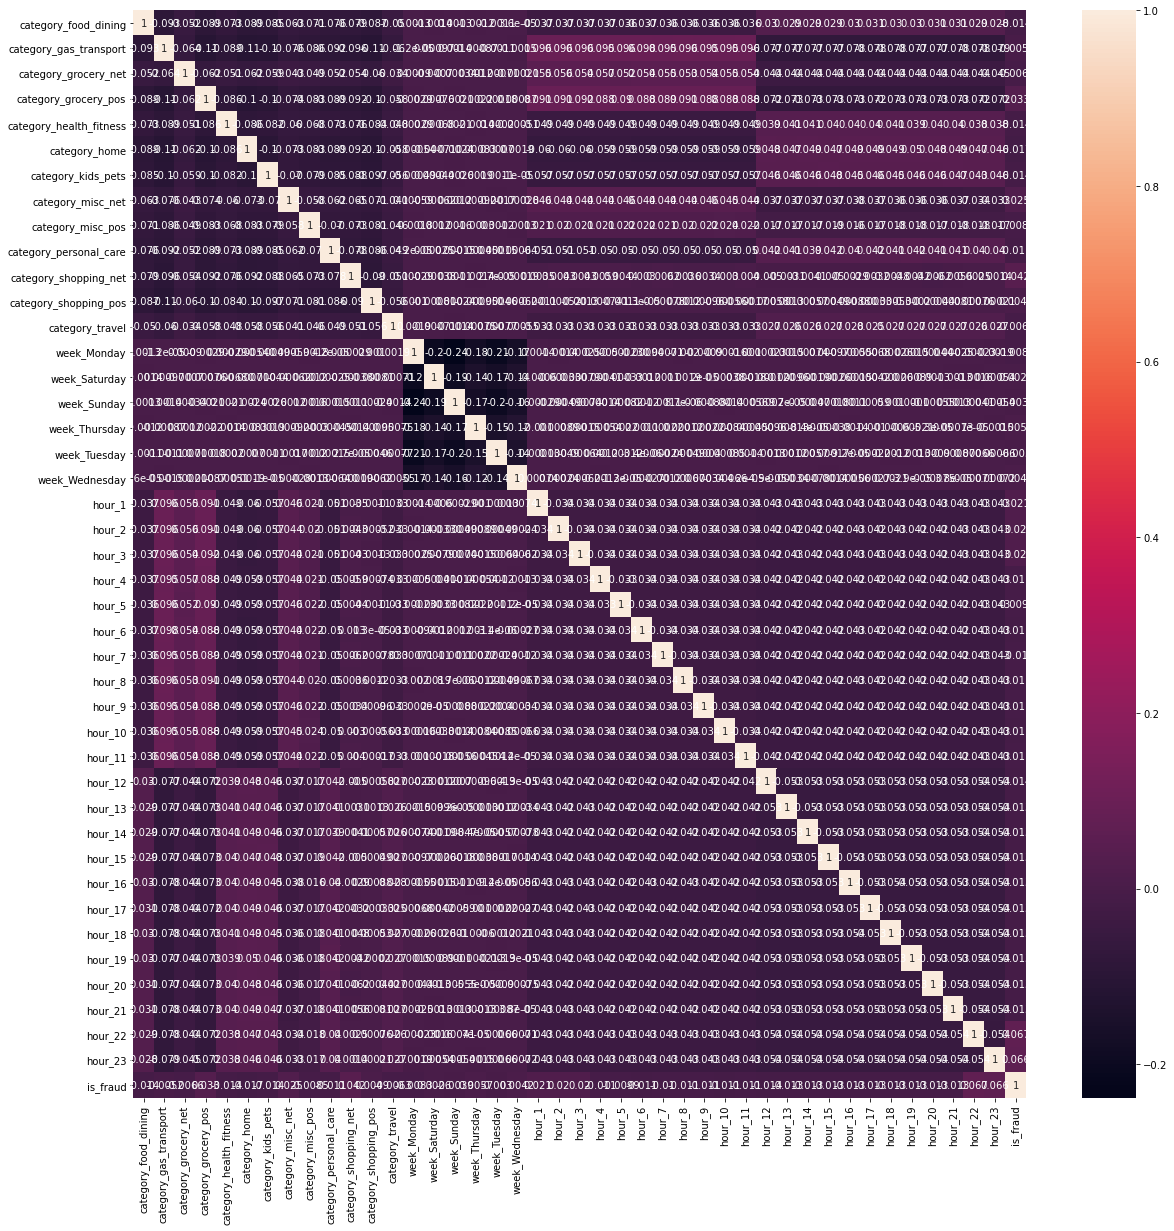

In [57]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_cat, annot=True)
plt.show()

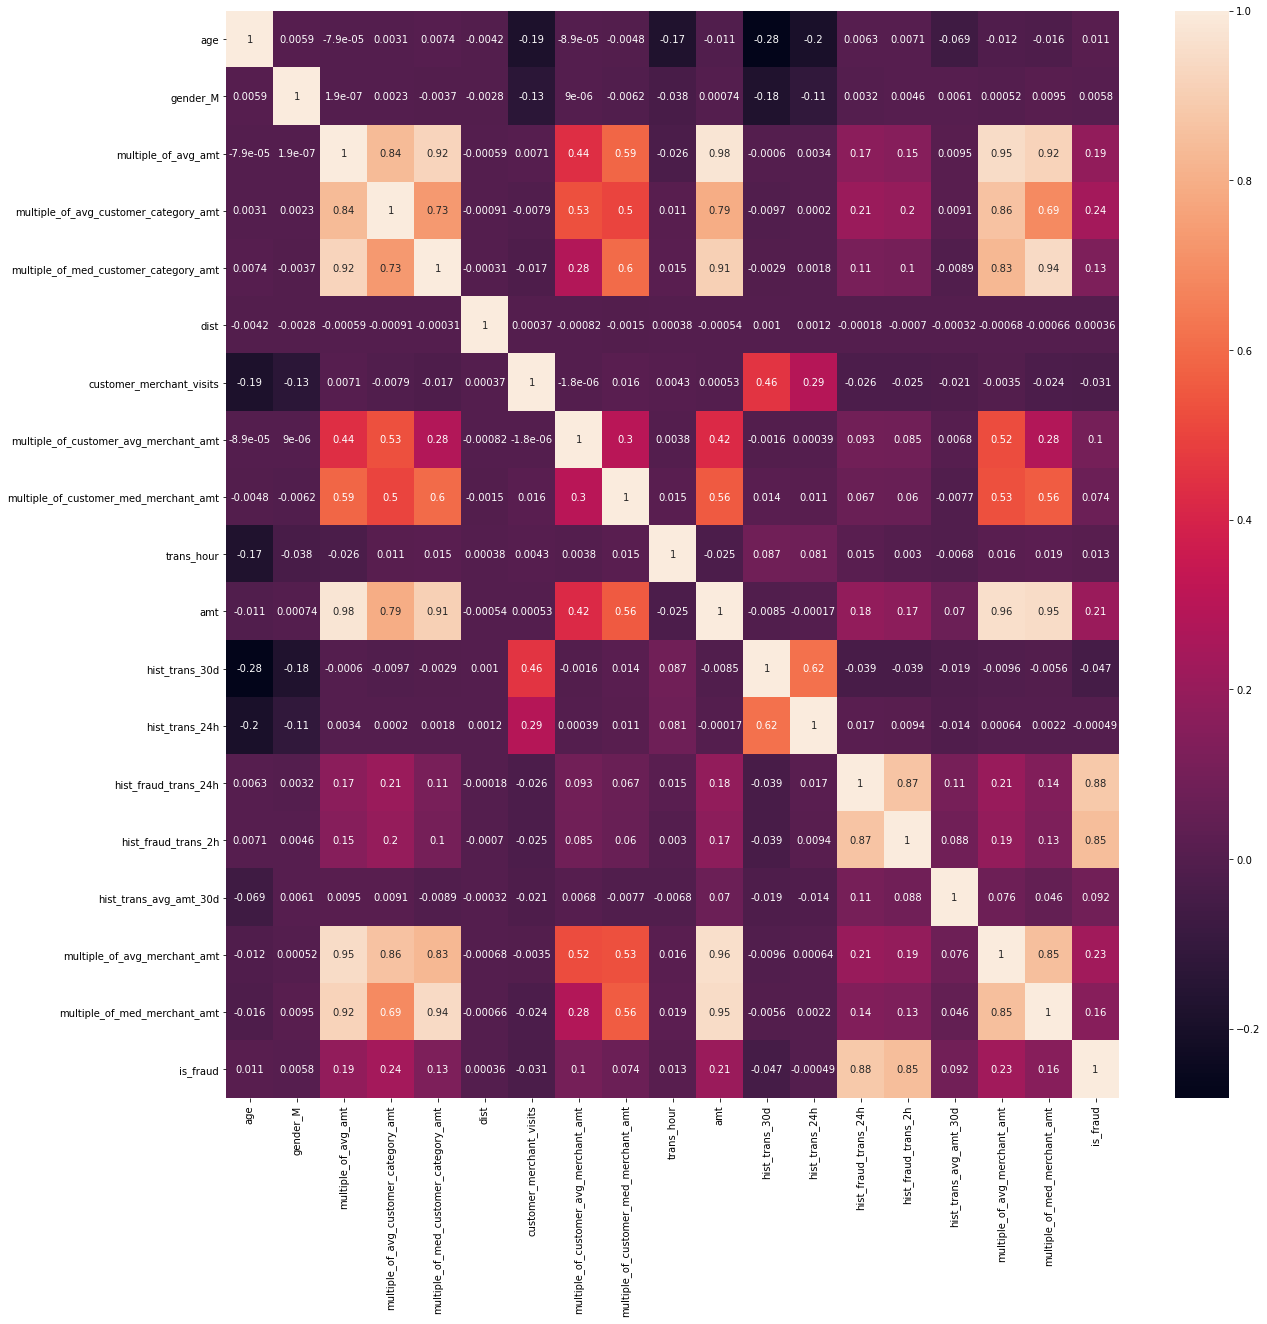

In [58]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_noncat, annot=True)
plt.show()

In [59]:
corr_cat.loc['is_fraud'].sort_values(ascending=False)

is_fraud                   1.000000
hour_22                    0.067328
hour_23                    0.065734
category_shopping_net      0.042452
category_grocery_pos       0.033483
category_misc_net          0.024667
hour_1                     0.021267
hour_3                     0.020400
hour_2                     0.020042
week_Thursday              0.005712
category_shopping_pos      0.004948
week_Wednesday             0.004183
week_Saturday              0.002612
week_Tuesday              -0.003026
week_Sunday               -0.003870
category_gas_transport    -0.005155
category_travel           -0.006286
category_grocery_net      -0.006649
week_Monday               -0.008270
category_misc_pos         -0.008514
hour_5                    -0.009865
hour_7                    -0.010232
hour_4                    -0.010648
hour_9                    -0.010687
hour_11                   -0.010764
hour_8                    -0.010808
hour_6                    -0.011007
hour_10                   -0

In [60]:
corr_noncat.loc['is_fraud'].sort_values(ascending=False)

is_fraud                                 1.000000
hist_fraud_trans_24h                     0.882766
hist_fraud_trans_2h                      0.848213
multiple_of_avg_customer_category_amt    0.242763
multiple_of_avg_merchant_amt             0.232571
amt                                      0.209307
multiple_of_avg_amt                      0.187428
multiple_of_med_merchant_amt             0.156442
multiple_of_med_customer_category_amt    0.127177
multiple_of_customer_avg_merchant_amt    0.103081
hist_trans_avg_amt_30d                   0.092209
multiple_of_customer_med_merchant_amt    0.073625
trans_hour                               0.013196
age                                      0.010686
gender_M                                 0.005844
dist                                     0.000359
hist_trans_24h                          -0.000486
customer_merchant_visits                -0.030609
hist_trans_30d                          -0.046550
Name: is_fraud, dtype: float64

# Resampling with SMOTE

In [61]:
xcols = cols
ycols = ['is_fraud']

df_x = df2[xcols]
df_y = df2[ycols]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
sme = SMOTE(random_state=1, sampling_strategy=0.5)

Xtrain, Xtest, ytrain, ytest = train_test_split(df_x, df_y, test_size=0.3, random_state=1,stratify=df_y)
Xtrain_res, ytrain_res = sme.fit_resample(Xtrain, ytrain)

In [64]:
Xtrain.shape

(1296737, 60)

In [65]:
Xtrain_res.shape

(1934971, 60)

In [66]:
print(ytrain_res[ytrain_res['is_fraud']==0].count()[0])
print(ytrain_res[ytrain_res['is_fraud']==1].count()[0])

1289981
644990


# Logistic Regression

### Accuracy: >99.99%
### Precision: 98%
### Recall: >99.99%

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logreg = LogisticRegression(random_state=1)

In [69]:
logreg.fit(Xtrain_res, ytrain_res)

LogisticRegression(random_state=1)

In [70]:
ypred = logreg.predict(Xtest)

In [71]:
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[552796     54]
 [    10   2885]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       0.98      1.00      0.99      2895

    accuracy                           1.00    555745
   macro avg       0.99      1.00      0.99    555745
weighted avg       1.00      1.00      1.00    555745



In [72]:
fpr, tpr, threshold = metrics.roc_curve(ytest, ypred)
roc_auc = metrics.auc(fpr, tpr)

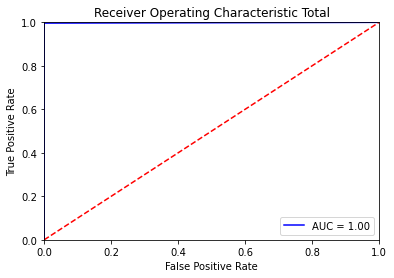

In [73]:
plt.title('Receiver Operating Characteristic Total')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--');plt.xlim([0, 1]);plt.ylim([0, 1])
plt.ylabel('True Positive Rate');plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree Results

### Accuracy: 100%
### Precision: 100%
### Recall: 100%
### 0 FNs and FPs

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 30, random_state=1)
dt_clf.fit(Xtrain_res, ytrain_res)

DecisionTreeClassifier(max_depth=30, random_state=1)

In [76]:
ypred = dt_clf.predict(Xtest)

print(confusion_matrix(ypred, ytest))
print(classification_report(ypred, ytest))

[[552850      0]
 [     0   2895]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745



In [77]:
fpr, tpr, threshold = metrics.roc_curve(ytest, ypred)
roc_auc = metrics.auc(fpr, tpr)

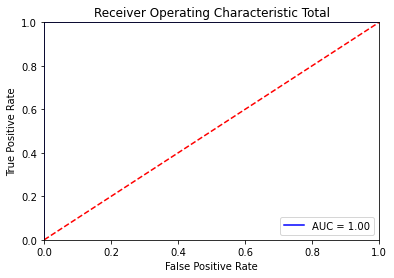

In [78]:
plt.title('Receiver Operating Characteristic Total')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--');plt.xlim([0, 1]);plt.ylim([0, 1])
plt.ylabel('True Positive Rate');plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Results

### Accuracy: 100%
### Precision: 100%
### Recall: 100%
### 0 FNs and FPs

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=1, verbose = 1)
rf_clf.fit(Xtrain_res, ytrain_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=1, verbose=1)

In [81]:
print("Test Results")
ypred = rf_clf.predict(Xtest)

print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred, digits=5))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


[[552850      0]
 [     0   2895]]
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000    552850
           1    1.00000   1.00000   1.00000      2895

    accuracy                        1.00000    555745
   macro avg    1.00000   1.00000   1.00000    555745
weighted avg    1.00000   1.00000   1.00000    555745



In [82]:
fpr, tpr, threshold = metrics.roc_curve(ytest, ypred)
roc_auc = metrics.auc(fpr, tpr)

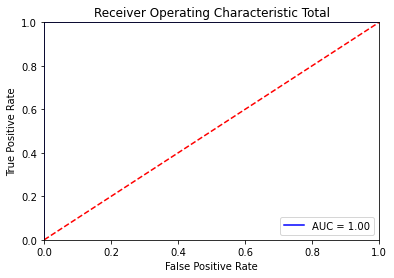

In [83]:
plt.title('Receiver Operating Characteristic Total')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--');plt.xlim([0, 1]);plt.ylim([0, 1])
plt.ylabel('True Positive Rate');plt.xlabel('False Positive Rate')
plt.show()